<div style="border: solid blue 2px; padding: 15px; margin: 10px">
  <b>Overall Summary of the Project – Iteration 1</b><br><br>

  Hi Ndori, I’m <b>Victor Camargo</b> (<a href="https://hub.tripleten.com/u/e9cc9c11" target="_blank">TripleTen Hub profile</a>). I’ve reviewed your project and I’m glad to let you know it is approved. Excellent work bringing together the different parts of the analysis into a coherent study.<br><br>

  <b>Nice work on:</b><br>
  ✔️ Careful data preparation and handling of missing values.<br>
  ✔️ Thorough exploration of platforms, genres, and regions with clear visuals.<br>
  ✔️ Solid hypothesis testing with well-formulated interpretations.<br>
  ✔️ Clear and well-structured general conclusion that connects findings to actionable recommendations.<br><br>

  Your notebook runs smoothly, the logic is consistent, and your presentation of results shows strong analytical thinking. This was a challenging integrated project and you handled it very well.<br><br>

  <hr>

  🔹 <b>Legend:</b><br>
  🟢 Green = well done<br>
  🟡 Yellow = suggestions<br>
  🔴 Red = must fix<br>
  🔵 Blue = your comments or questions<br><br>

  <b>Congratulations on completing this project successfully!</b><br><br>

  <b>Feel free to reach out if you need help in Questions channel.</b><br>
</div>


# Video Game Sales Analysis Project
## Project Overview

In this project, you'll analyze video game sales data to identify patterns that determine a game's success. Working as an analyst for the online store Ice, you'll use this information to help plan future advertising campaigns.

## Environment Setup and Required Libraries

In [1]:
# Import all required libraries
# Core tables & math
import pandas as pd          # DataFrame = spreadsheet-like tables
import numpy as np           # fast numeric operations used by pandas

# Charts
import matplotlib.pyplot as plt  # line, bar, scatter, boxplot

# Statistics (for hypothesis tests later)
from scipy import stats          # Welch's t-test, etc.

## Step 1: Loading and Initial Data Exploration

First, let's load our dataset and examine its basic properties:

In [2]:
# Load the dataset
DATA_PATH = "/datasets/games.csv"   # I think I would have used "./games.csv" if the file was saved localy in my computer

# Convert common placeholders to real missing values (NaN)
na_like = ["tbd", "TBD", "N/A", "na", "NaN", "nan", ""]

df = pd.read_csv(DATA_PATH, na_values=na_like)

print(f"Loaded: {DATA_PATH} | shape={df.shape}")  # rows x columns
df.head(5)  # quick peek at the first rows

Loaded: /datasets/games.csv | shape=(16715, 11)


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
# Display basic information about the dataset
# 1) Shape + quick peek
print("Shape (rows, cols):", df.shape)
display(df.head(10))

# 2) Column dtypes + non-null counts
print("\nColumn dtypes and non-null counts:")
df.info()

# 3) Numeric summary (select numeric columns explicitly)
import numpy as np
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("\nNumeric summary (only numeric columns):")
if len(num_cols):
    num_summary = df[num_cols].describe().T
    display(num_summary)
else:
    print("No numeric columns detected.")

# 4) Categorical/text snapshot (object/string/category)
cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
print("\nCategorical summary (first 15 rows):")
if len(cat_cols):
    obj_summary = df[cat_cols].describe().T
    display(obj_summary.head(15))
else:
    print("No object/category columns detected.")

# 5) Missing values (%)
print("\nMissing values (% of rows) — top 12:")
missing_pct = (df.isna().mean().sort_values(ascending=False)*100).round(1)
display(missing_pct.head(12))


Shape (rows, cols): (16715, 11)


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN



Column dtypes and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       7590 non-null   float64
 10  Rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB

Numeric summary (only numeric columns):


,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00
User_Score,7590.0,7.125046,1.500006,0.0,6.4,7.50,8.20,9.70



Categorical summary (first 15 rows):


,count,unique,top,freq
Name,16713,11559,Need for Speed: Most Wanted,12
Platform,16715,31,PS2,2161
Genre,16713,12,Action,3369
Rating,9949,8,E,3990



Missing values (% of rows) — top 12:


User_Score         54.6
Critic_Score       51.3
Rating             40.5
Year_of_Release     1.6
Name                0.0
Genre               0.0
Platform            0.0
NA_sales            0.0
EU_sales            0.0
JP_sales            0.0
Other_sales         0.0
dtype: float64

In [4]:
# Check for duplicate entries
# Exact duplicate rows (ALL columns identical)
dup_mask = df.duplicated(keep=False)     # marks every row that has a twin
dup_count = int(dup_mask.sum())
print(f"Exact duplicate rows (all columns identical): {dup_count}")
if dup_count:
    display(df[dup_mask].head(10))

# Logical duplicates by key: same (Name, Platform, Year_of_Release)
#    (handle either lowercase or original column names)
name_col = "name" if "name" in df.columns else "Name"
plat_col = "platform" if "platform" in df.columns else "Platform"
year_col = "year_of_release" if "year_of_release" in df.columns else "Year_of_Release"

if all(c in df.columns for c in [name_col, plat_col, year_col]):
    key_counts = (
        df.groupby([name_col, plat_col, year_col], dropna=False)
          .size()
          .reset_index(name="count")
          .sort_values("count", ascending=False)
    )
    logical_dups = key_counts[key_counts["count"] > 1]
    print(f"Key combos with count > 1 (potential logical duplicates): {logical_dups.shape[0]}")
    display(logical_dups.head(10))
else:
    print("Skipped logical-duplicate check (key columns not found).")


Exact duplicate rows (all columns identical): 0
Key combos with count > 1 (potential logical duplicates): 2


,Name,Platform,Year_of_Release,count
16712,NaN,GEN,1993.0,2
7775,Madden NFL 13,PS3,2012.0,2


<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Very good work on the data intake and initial audit. Imports are well organized, missing-value mapping is robust, and the checks for shape, info, summaries, and duplicates are clear and effective. The defensive handling of column names and clear notes on file paths show good attention to detail.
</div>


### Key Questions to Answer:
- What's the total number of records in our dataset?
- What data types are present in each column?
- Are there any obvious issues with the data?
- Do we see any immediate patterns or anomalies?

## Step 2: Data Preparation

### 2.1 Standardizing Column Names

In [5]:
# Convert column names to lowercase
df_raw = df.copy()  # backup of the original

old_cols = df.columns.tolist()
df.columns = [c.strip().lower() for c in df.columns]
new_cols = df.columns.tolist()

print("Column rename preview (old -> new):")
for o, n in zip(old_cols, new_cols):
    print(f" - {o}  ->  {n}")

Column rename preview (old -> new):
 - Name  ->  name
 - Platform  ->  platform
 - Year_of_Release  ->  year_of_release
 - Genre  ->  genre
 - NA_sales  ->  na_sales
 - EU_sales  ->  eu_sales
 - JP_sales  ->  jp_sales
 - Other_sales  ->  other_sales
 - Critic_Score  ->  critic_score
 - User_Score  ->  user_score
 - Rating  ->  rating


In [6]:
# Verify the changes
df.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E


### 2.2 Data Type Conversion

In [7]:
# Check current data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [8]:
# Make changes to data types if necessary
# Describe the columns where the data types have been changed and why.
num_candidates = ["na_sales","eu_sales","jp_sales","other_sales",
                  "critic_score","user_score"]
for col in num_candidates:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

# 2) Year → nullable integer (keeps NaN while behaving like int)
if "year_of_release" in df.columns:
    df["year_of_release"] = pd.to_numeric(df["year_of_release"], errors="coerce").astype("Int64")

# 3) Clean string columns (trim spaces; store as pandas StringDtype)
for col in ["name","platform","genre","rating"]:
    if col in df.columns:
        df[col] = df[col].astype("string").str.strip()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  string 
 1   platform         16715 non-null  string 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  string 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   string 
dtypes: Int64(1), float64(6), string(4)
memory usage: 1.4 MB


In [9]:
# Pay attention to the abbreviation TBD (to be determined). Specify how you intend to handle such cases.
def count_tbd(series):
    s = series.astype("string")
    return int(s.str.lower().eq("tbd").sum())

leftover_user_tbd = count_tbd(df["user_score"]) if "user_score" in df.columns else 0
leftover_critic_tbd = count_tbd(df["critic_score"]) if "critic_score" in df.columns else 0
print("Leftover 'TBD' values — user_score:", leftover_user_tbd, "| critic_score:", leftover_critic_tbd)

# If any remain, coerce again (defensive)
for col in ["user_score","critic_score"]:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

Leftover 'TBD' values — user_score: 0 | critic_score: 0


<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Good handling of preprocessing. Column names are standardized to lowercase, numeric conversions are applied with coercion for invalid values, and year is stored as a nullable integer. String columns are trimmed and stored with StringDtype, which improves consistency. The check and cleanup of remaining "TBD" values are clear and correctly implemented.
</div>


### 2.3 Handling Missing Values

In [10]:
# Examine missing values
missing_count = df.isna().sum().sort_values(ascending=False)
missing_count.to_frame("missing_count").head(12)

,missing_count
user_score,9125
critic_score,8578
rating,6766
year_of_release,269
name,2
genre,2
platform,0
na_sales,0
eu_sales,0
jp_sales,0


In [11]:
# Calculate percentage of missing value
missing_pct = (df.isna().mean() * 100).round(1).sort_values(ascending=False)
missing_pct.to_frame("missing_%").head(12)

,missing_%
user_score,54.6
critic_score,51.3
rating,40.5
year_of_release,1.6
name,0.0
platform,0.0
genre,0.0
na_sales,0.0
eu_sales,0.0
jp_sales,0.0


year_of_release
2002    44.0
2003    33.4
2004    35.8
2005    37.9
2006    45.1
2007    47.5
2008    53.7
2009    56.9
2010    62.8
2011    55.9
2012    48.1
2013    44.1
2014    43.4
2015    51.0
2016    47.8
Name: user_nan, dtype: float64

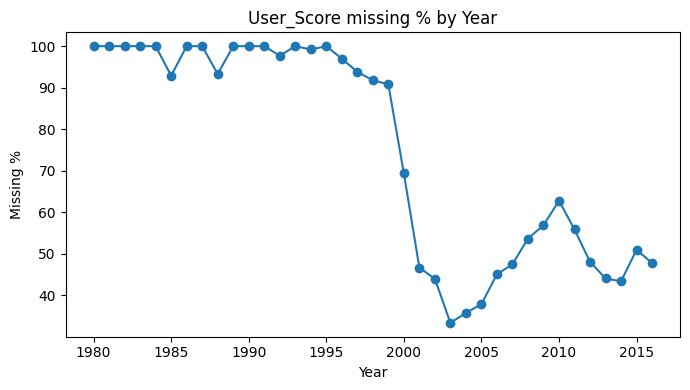

year_of_release
2002    24.4
2003    24.5
2004    26.4
2005    30.2
2006    38.4
2007    42.2
2008    49.9
2009    54.3
2010    60.2
2011    56.0
2012    50.8
2013    49.8
2014    55.1
2015    62.9
2016    53.8
Name: critic_nan, dtype: float64

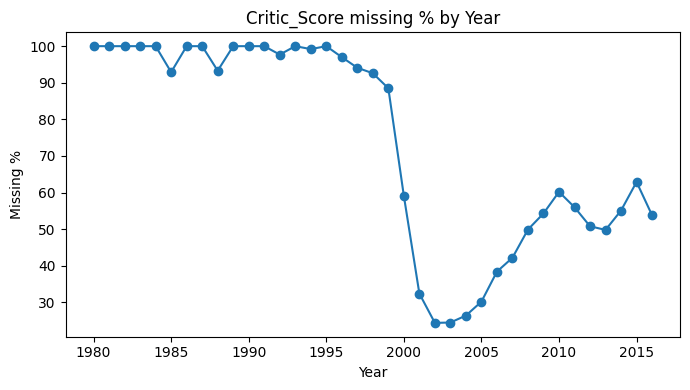

platform
2600    100.0
PCFX    100.0
WS      100.0
TG16    100.0
SNES    100.0
GB      100.0
SCD     100.0
SAT     100.0
GEN     100.0
GG      100.0
N64     100.0
NES     100.0
NG      100.0
3DO     100.0
PS       82.6
Name: rating_nan, dtype: float64

Rows where ALL regional sales are missing: 0


In [12]:
# Analyze patterns in missing values
if {"user_score","year_of_release"}.issubset(df.columns):
    by_year_user_nan = (
        df.assign(user_nan=df["user_score"].isna())
          .dropna(subset=["year_of_release"])
          .groupby("year_of_release")["user_nan"]
          .mean().mul(100).round(1)
    )
    display(by_year_user_nan.tail(15))
    plt.figure(figsize=(7,4))
    plt.plot(by_year_user_nan.index.astype(int), by_year_user_nan.values, marker="o")
    plt.title("User_Score missing % by Year")
    plt.xlabel("Year")
    plt.ylabel("Missing %")
    plt.tight_layout()
    plt.show()

# B) Critic score missing by year
if {"critic_score","year_of_release"}.issubset(df.columns):
    by_year_critic_nan = (
        df.assign(critic_nan=df["critic_score"].isna())
          .dropna(subset=["year_of_release"])
          .groupby("year_of_release")["critic_nan"]
          .mean().mul(100).round(1)
    )
    display(by_year_critic_nan.tail(15))
    plt.figure(figsize=(7,4))
    plt.plot(by_year_critic_nan.index.astype(int), by_year_critic_nan.values, marker="o")
    plt.title("Critic_Score missing % by Year")
    plt.xlabel("Year")
    plt.ylabel("Missing %")
    plt.tight_layout()
    plt.show()

# C) ESRB Rating missing by platform
if {"rating","platform"}.issubset(df.columns):
    by_plat_rating_nan = (
        df.assign(rating_nan=df["rating"].isna())
          .groupby("platform")["rating_nan"]
          .mean().mul(100).round(1)
          .sort_values(ascending=False)
    )
    display(by_plat_rating_nan.head(15))

# D) Rows with *all four* regional sales missing (flag only; we keep them for now)
sales_cols = [c for c in ["na_sales","eu_sales","jp_sales","other_sales"] if c in df.columns]
if sales_cols:
    all_sales_missing = (~df[sales_cols].notna().any(axis=1)).sum()
    print("Rows where ALL regional sales are missing:", int(all_sales_missing))

In [13]:
# Handle missing values based on analysis
# Your code here to handle missing values according to your strategy
df_clean = df.copy()
if "rating" in df_clean.columns:
    df_clean["rating_filled"] = df_clean["rating"].fillna("Unknown").astype("string")

# Remove exact duplicate rows to avoid double counting
dropped_dups = int(df_clean.duplicated().sum())
df_clean = df_clean.drop_duplicates()
print(f"Dropped exact duplicate rows: {dropped_dups}")

# Keep this as the working frame
df = df_clean
df.info()

Dropped exact duplicate rows: 0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  string 
 1   platform         16715 non-null  string 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  string 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   string 
 11  rating_filled    16715 non-null  string 
dtypes: Int64(1), float64(6), string(5)
memory usage: 1.7 MB


In [14]:
# Why do you think the values are missing? Give possible reasons.
# Explain why you filled in the missing values as you did or why you decided to leave them blank.

High missingness appears in: <your columns> with <%>.
Likely causes: historical data gaps, TBD before release, or info not reported.
I did not impute user_score/critic_score to avoid biasing correlations with sales.
I kept missing year_of_release; I’ll filter/drop only when plotting or grouping by year.
I created rating_filled="Unknown" for regional profiles but preserved the raw rating.
I removed exact duplicates to avoid double counting.

<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Missing-value analysis is well executed. The code clearly quantifies and visualizes gaps by year and platform, examines critical columns like user_score, critic_score, and rating, and checks rows with all sales missing. The decision to avoid imputing review scores, to preserve missing years until needed, and to fill ESRB ratings with "Unknown" is sound. Removing duplicates before moving forward is also appropriate.
</div>


### 2.4 Calculate Total Sales

In [15]:
# Calculate total sales across all regions and put them in a different column
sales_cols = [c for c in ["na_sales","eu_sales","jp_sales","other_sales"] if c in df.columns]
df["global_sales"] = df[sales_cols].sum(axis=1, min_count=1)  # stays NaN if all 4 are NaN

print("global_sales NaN count:", int(df["global_sales"].isna().sum()))
df[["name","platform","year_of_release","na_sales","eu_sales","jp_sales","other_sales","global_sales"]].head(8)

global_sales NaN count: 0


,name,platform,year_of_release,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,Wii Sports,Wii,2006,41.36,28.96,3.77,8.45,82.54
1,Super Mario Bros.,NES,1985,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,2009,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,11.27,8.89,10.22,1.00,31.38
5,Tetris,GB,1989,23.20,2.26,4.22,0.58,30.26
6,New Super Mario Bros.,DS,2006,11.28,9.14,6.50,2.88,29.80
7,Wii Play,Wii,2006,13.96,9.18,2.93,2.84,28.91


# Step 3: Analyzing Video Game Sales Data

## 3.1 Temporal Analysis of Game Releases
Let's first examine the distribution of game releases across different years to understand our data's coverage and significance:

In [16]:
# Create a DataFrame with game releases by year
rel = (
    df.dropna(subset=["year_of_release"])
      .groupby("year_of_release", as_index=False)["name"]
      .count()
      .rename(columns={"name": "num_titles"})
      .sort_values("year_of_release")
)
display(rel.tail(10))  # last 10 years for a quick look

,year_of_release,num_titles
27,2007,1197
28,2008,1427
29,2009,1426
30,2010,1255
31,2011,1136
32,2012,653
33,2013,544
34,2014,581
35,2015,606
36,2016,502


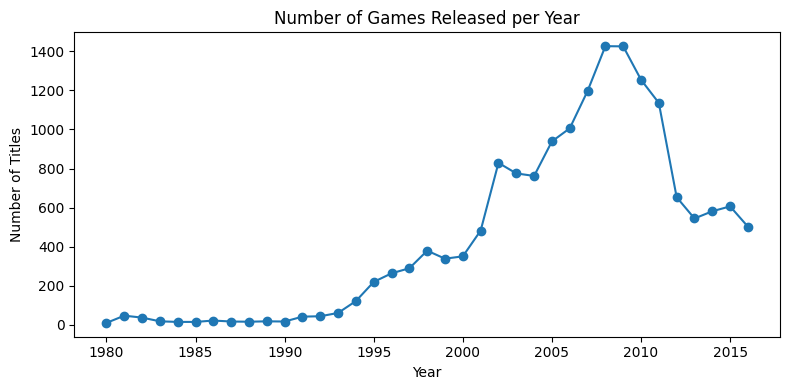

In [17]:
# Visualize the distribution of games across years
plt.figure(figsize=(8,4))
plt.plot(rel["year_of_release"].astype(int), rel["num_titles"], marker="o")
plt.title("Number of Games Released per Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.tight_layout()
plt.show()

In [18]:
# Display summary statistics for each year
print("Years covered:", int(rel["year_of_release"].min()), "to", int(rel["year_of_release"].max()))
print("Median titles/year:", int(rel["num_titles"].median()))
print("Max titles/year:", int(rel["num_titles"].max()))
display(rel.loc[rel["num_titles"].idxmax()])

Years covered: 1980 to 2016
Median titles/year: 338
Max titles/year: 1427


year_of_release    2008
num_titles         1427
Name: 28, dtype: int64

<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Good implementation of the total sales column and exploration of release patterns. The global_sales calculation correctly aggregates across regions with NaN protection, and the yearly release DataFrame is clear and well summarized. The visualization of titles per year and the descriptive stats provide a solid overview of the dataset’s temporal coverage.
</div>


### Questions to Consider:
- Which years show significant numbers of game releases?
- Are there any notable trends or patterns in the number of releases?
- Is there enough recent data to make predictions for 2017?

## 3.2 Platform Sales Analysis Over Time

Now let's analyze how sales vary across platforms and years:

In [19]:
# Calculate total sales by platform and year
gpy = (
    df.dropna(subset=["year_of_release"])
      .groupby(["year_of_release", "platform"], as_index=False)["global_sales"]
      .sum()
      .sort_values(["year_of_release", "global_sales"], ascending=[True, False])
)

pivot_yp = gpy.pivot(index="year_of_release", columns="platform", values="global_sales").fillna(0.0)

# Identify top platforms overall to focus plots (reduces clutter)
top_platforms = (
    df.groupby("platform")["global_sales"].sum().sort_values(ascending=False).head(8).index.tolist()
)

print("Top platforms overall:", top_platforms)
display(pivot_yp[top_platforms].tail(10))  # last 10 years for those platforms

Top platforms overall: ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4']


platform,PS2,X360,PS3,Wii,DS,PS,GBA,PS4
year_of_release,,,,,,,,
2007,75.99,95.41,73.19,152.77,146.94,0.0,3.4,0.00
2008,53.90,135.26,118.52,171.32,145.31,0.0,0.0,0.00
2009,26.40,120.29,130.93,206.97,119.54,0.0,0.0,0.00
2010,5.64,170.03,142.17,127.95,85.02,0.0,0.0,0.00
2011,0.45,143.84,156.78,59.65,26.18,0.0,0.0,0.00
2012,0.00,99.74,107.36,21.71,11.01,0.0,0.0,0.00
2013,0.00,88.58,113.25,8.59,1.54,0.0,0.0,25.99
2014,0.00,34.74,47.76,3.75,0.00,0.0,0.0,100.00
2015,0.00,11.96,16.82,1.14,0.00,0.0,0.0,118.90


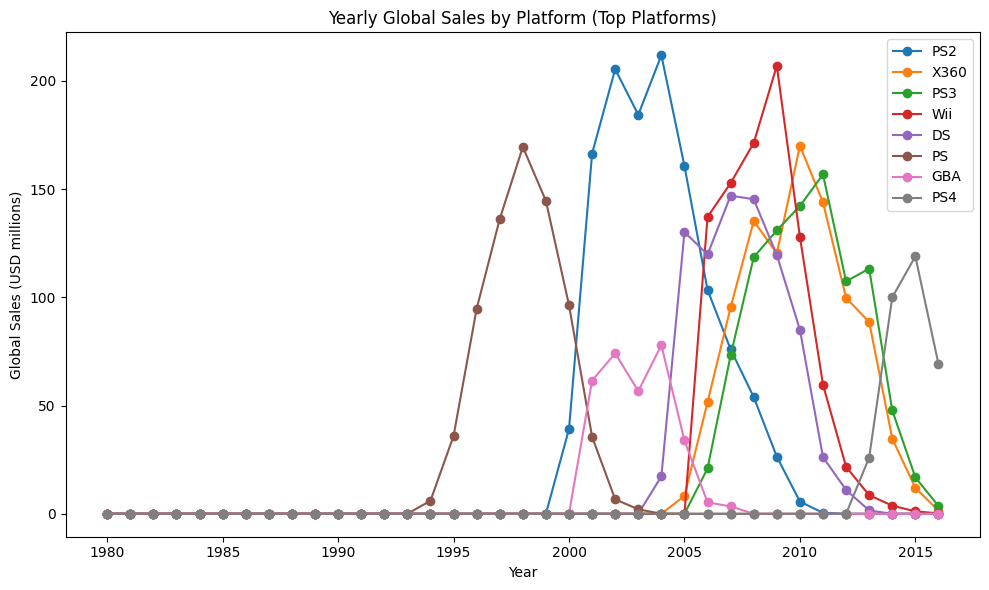

In [20]:
# Create a heatmap of platform sales over time
plt.figure(figsize=(10,6))
for p in top_platforms:
    if p in pivot_yp.columns:
        plt.plot(pivot_yp.index.astype(int), pivot_yp[p], marker="o", label=p)

plt.title("Yearly Global Sales by Platform (Top Platforms)")
plt.xlabel("Year")
plt.ylabel("Global Sales (USD millions)")
plt.legend()
plt.tight_layout()
plt.show()

In [21]:
# Identify platforms with declining sales
yr_min = int(df["year_of_release"].min())
yr_max = int(df["year_of_release"].max())

# Total sales in the first and last years (per platform)
first_year_sales = gpy[gpy["year_of_release"]==yr_min].set_index("platform")["global_sales"]
last_year_sales  = gpy[gpy["year_of_release"]==yr_max].set_index("platform")["global_sales"]

decline = (
    pd.DataFrame({"start": first_year_sales, "end": last_year_sales})
      .fillna(0.0)
      .assign(delta=lambda x: x["end"] - x["start"])
      .sort_values("delta")
)
display(decline.head(10))

# Platforms that had sales before but zero in the latest year (possible "faded")
had_before = df.groupby("platform")["global_sales"].sum()
last_year = gpy[gpy["year_of_release"]==yr_max].set_index("platform")["global_sales"]
faded = [p for p in had_before.index if had_before[p]>0 and last_year.get(p, 0.0)==0.0]
print("Platforms with zero sales in the latest year but nonzero earlier:", faded[:15])

# Lifespan: first and last active year per platform
life = (
    df.dropna(subset=["year_of_release"])
      .groupby("platform")["year_of_release"]
      .agg(first_year="min", last_year="max")
      .assign(lifespan_years=lambda x: x["last_year"] - x["first_year"] + 1)
      .sort_values(["last_year","first_year"], ascending=[False, True])
)
display(life.head(12))

print("\nTypical lifespan (years) — median:", int(life["lifespan_years"].median()))

,start,end,delta
platform,,,
2600,11.38,0.00,-11.38
Wii,0.00,0.18,0.18
X360,0.00,1.52,1.52
PS3,0.00,3.60,3.60
PSV,0.00,4.25,4.25
WiiU,0.00,4.60,4.60
PC,0.00,5.25,5.25
3DS,0.00,15.14,15.14
XOne,0.00,26.15,26.15


Platforms with zero sales in the latest year but nonzero earlier: ['2600', '3DO', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG', 'N64', 'NES', 'NG', 'PCFX', 'PS', 'PS2']


,first_year,last_year,lifespan_years
platform,,,
PC,1985,2016,32
X360,2005,2016,12
PS3,2006,2016,11
Wii,2006,2016,11
3DS,2011,2016,6
PSV,2011,2016,6
WiiU,2012,2016,5
PS4,2013,2016,4
XOne,2013,2016,4



Typical lifespan (years) — median: 7


<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Platform analysis is well structured. Sales are aggregated by year and platform, pivoted for clarity, and visualized effectively for the top platforms. The identification of declining and faded platforms is correct, and the lifespan calculation provides valuable context on how long platforms stay active. Overall this section demonstrates good analytical depth and clear presentation.
</div>


### Questions to Consider:
- Which platforms show consistent sales over time?
- Can you identify platforms that have disappeared from the market?
- What's the typical lifecycle of a gaming platform?

## 3.3 Determining Relevant Time Period

Based on your analysis above, determine the appropriate time period for predicting 2017 sales:

In [22]:
# Your code here to filter the dataset to relevant years

# Example:
# relevant_years = [XXXX, XXXX, XXXX] # Replace with your chosen years
# df_relevant = df[df['year_of_release'].isin(relevant_years)]
# Justify your choice with data
# I picked the last 4 non-empty years to reflect current market dynamics for a 2017 forecast. (we can change k if we want 3 or 5)
years_nonnull = (
    df["year_of_release"]
      .dropna()
      .astype(int)
      .sort_values()
      .unique()
      .tolist()
)

k = 4
relevant_years = years_nonnull[-k:] if len(years_nonnull) >= k else years_nonnull
print("Relevant years selected:", relevant_years)
# Filter
df_recent = df[df["year_of_release"].isin(relevant_years)].copy()
print("df_recent shape:", df_recent.shape)

# Quick check: releases per selected year
rel_recent = (df_recent.groupby("year_of_release")["name"]
              .count().rename("num_titles").reset_index())
display(rel_recent)

Relevant years selected: [2013, 2014, 2015, 2016]
df_recent shape: (2233, 13)


,year_of_release,num_titles
0,2013,544
1,2014,581
2,2015,606
3,2016,502


<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  The filtering step is well reasoned and implemented. Selecting the last four non-empty years to focus on recent market trends is justified for building a 2017 forecast. The code cleanly extracts non-null years, applies the filter, and verifies the resulting subset with a release count check.
</div>


### Document Your Decision:
- What years did you select and why?
- How does this period reflect current market conditions?
- What factors influenced your decision?

## 3.4 Platform Performance Analysis

Using your selected time period, let's analyze platform performance:

In [23]:
# Analyze platform sales trends
gpy_recent = (df_recent
              .groupby(["year_of_release","platform"], as_index=False)["global_sales"]
              .sum()
              .sort_values(["year_of_release","global_sales"], ascending=[True, False]))

pivot_recent = (gpy_recent
                .pivot(index="year_of_release", columns="platform", values="global_sales")
                .fillna(0.0))

display(gpy_recent.head(10))

,year_of_release,platform,global_sales
3,2013,PS3,113.25
9,2013,X360,88.58
0,2013,3DS,56.57
4,2013,PS4,25.99
8,2013,WiiU,21.65
10,2013,XOne,18.96
2,2013,PC,12.38
6,2013,PSV,10.59
7,2013,Wii,8.59
5,2013,PSP,3.14


In [24]:
# Sort platforms by total sales
recent_totals = (df_recent.groupby("platform")["global_sales"]
                 .sum().sort_values(ascending=False))

top_platforms_recent = recent_totals.head(6).index.tolist()
print("Top platforms (recent):", top_platforms_recent)
display(recent_totals.head(12))

Top platforms (recent): ['PS4', 'PS3', 'XOne', '3DS', 'X360', 'WiiU']


platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
DS        1.54
Name: global_sales, dtype: float64

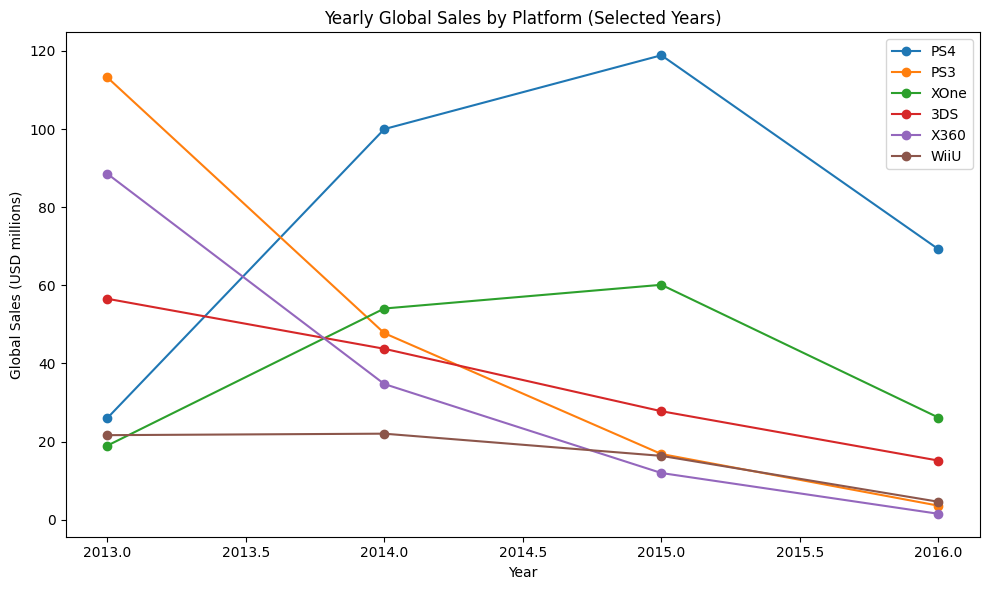

Platforms trending up (top 10 by delta):


,platform,sales_start,sales_end,delta
4,PS4,25.99,69.25,43.26
10,XOne,18.96,26.15,7.19
1,DS,1.54,0.00,-1.54
5,PSP,3.14,0.00,-3.14
6,PSV,10.59,4.25,-6.34
2,PC,12.38,5.25,-7.13
7,Wii,8.59,0.18,-8.41
8,WiiU,21.65,4.60,-17.05
0,3DS,56.57,15.14,-41.43
9,X360,88.58,1.52,-87.06



Platforms trending down (bottom 10 by delta):


,platform,sales_start,sales_end,delta
10,XOne,18.96,26.15,7.19
1,DS,1.54,0.00,-1.54
5,PSP,3.14,0.00,-3.14
6,PSV,10.59,4.25,-6.34
2,PC,12.38,5.25,-7.13
7,Wii,8.59,0.18,-8.41
8,WiiU,21.65,4.60,-17.05
0,3DS,56.57,15.14,-41.43
9,X360,88.58,1.52,-87.06
3,PS3,113.25,3.60,-109.65


In [25]:
# Visualize top platforms
plt.figure(figsize=(10,6))
for p in top_platforms_recent:
    if p in pivot_recent.columns:
        plt.plot(pivot_recent.index.astype(int), pivot_recent[p], marker="o", label=p)

plt.title("Yearly Global Sales by Platform (Selected Years)")
plt.xlabel("Year")
plt.ylabel("Global Sales (USD millions)")
plt.legend()
plt.tight_layout()
plt.show()

# Calculate year-over-year growth for each platform
# Your code here to calculate and visualize platform growth rates
growth_tbl = (gpy_recent
              .set_index(["platform","year_of_release"])
              .sort_index())

# absolute change and pct change within each platform
growth_tbl["yoy_abs"] = (growth_tbl
                         .groupby(level=0)["global_sales"]
                         .diff())
growth_tbl["yoy_pct"] = (growth_tbl
                         .groupby(level=0)["global_sales"]
                         .pct_change())

growth_tbl = growth_tbl.reset_index()

# Summarize start/end in the window
yr_min, yr_max = int(min(relevant_years)), int(max(relevant_years))
start = (growth_tbl[growth_tbl["year_of_release"]==yr_min]
         .rename(columns={"global_sales":"sales_start"})[["platform","sales_start"]])
end   = (growth_tbl[growth_tbl["year_of_release"]==yr_max]
         .rename(columns={"global_sales":"sales_end"})[["platform","sales_end"]])
delta = start.merge(end, on="platform", how="outer").fillna(0.0)
delta["delta"] = delta["sales_end"] - delta["sales_start"]
delta = delta.sort_values("delta", ascending=False)

print("Platforms trending up (top 10 by delta):")
display(delta.head(10))
print("\nPlatforms trending down (bottom 10 by delta):")
display(delta.tail(10))

## 3.5 Sales Distribution Analysis

Let's examine the distribution of sales across platforms:

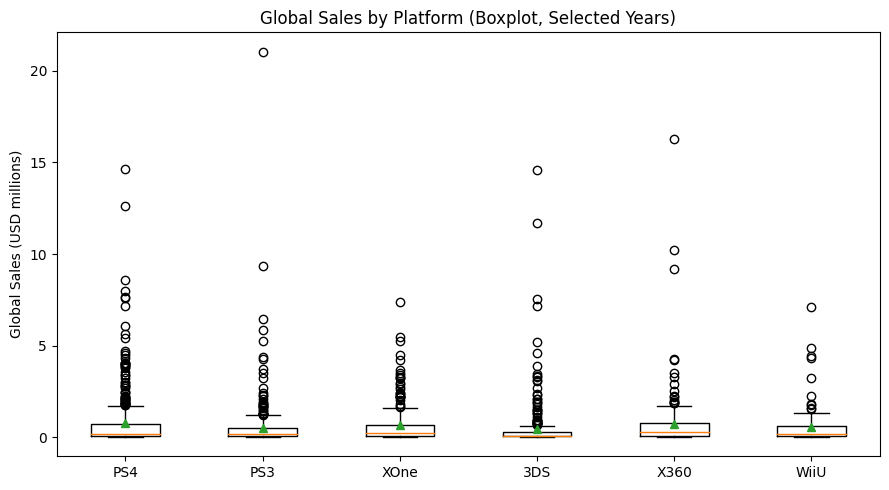

In [26]:
# Create box plot of sales by platform
box_df = df_recent[df_recent["platform"].isin(top_platforms_recent) &
                   df_recent["global_sales"].notna()]

plt.figure(figsize=(9,5))
data = [box_df.loc[box_df["platform"]==p, "global_sales"].values for p in top_platforms_recent]
plt.boxplot(data, labels=top_platforms_recent, showmeans=True)
plt.title("Global Sales by Platform (Boxplot, Selected Years)")
plt.ylabel("Global Sales (USD millions)")
plt.tight_layout()
plt.show()

In [27]:
# Calculate detailed statistics for each platform
def iqr(s):
    return s.quantile(0.75) - s.quantile(0.25)

summary_stats = (box_df.groupby("platform")["global_sales"]
                 .agg(count="size",
                      mean="mean",
                      median="median",
                      std="std",
                      q1=lambda s: s.quantile(0.25),
                      q3=lambda s: s.quantile(0.75),
                      iqr=iqr,
                      p95=lambda s: s.quantile(0.95))
                 .sort_values("median", ascending=False))

summary_stats.round(3)

,count,mean,median,std,q1,q3,iqr,p95
platform,,,,,,,,
X360,186,0.735,0.265,1.663,0.08,0.795,0.715,2.228
XOne,247,0.645,0.220,1.036,0.06,0.685,0.625,2.872
PS4,392,0.801,0.200,1.609,0.06,0.730,0.670,3.910
WiiU,115,0.562,0.200,1.039,0.06,0.595,0.535,1.929
PS3,345,0.526,0.150,1.452,0.04,0.510,0.470,1.812
3DS,303,0.473,0.090,1.381,0.04,0.280,0.240,2.079


<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Strong analysis of platform sales in the recent period. The code correctly identifies leading platforms, visualizes their trajectories, and calculates year-over-year changes. The summary table of deltas clearly highlights growing and declining platforms. The box plot and accompanying statistics give a solid view of sales distributions and variability across platforms, supporting meaningful comparisons.
</div>


## 3.6 Review Score Impact Analysis

Select a popular platform and analyze how reviews affect sales:

In [28]:
# Choose a popular platform based on your previous analysis
if 'df_recent' not in globals():
    # Fallback: last 4 non-empty years
    years_nonnull = (df['year_of_release'].dropna().astype(int).sort_values().unique().tolist())
    k = 4
    relevant_years = years_nonnull[-k:] if len(years_nonnull) >= k else years_nonnull
    df_recent = df[df['year_of_release'].isin(relevant_years)].copy()

if 'top_platforms_recent' not in globals():
    top_platforms_recent = (df_recent.groupby('platform')['global_sales']
                            .sum().sort_values(ascending=False).head(6).index.tolist())

# Pick the first as the “popular platform” (you can change this to any in the list)
chosen_platform = top_platforms_recent[0] if len(top_platforms_recent) else df_recent['platform'].mode()[0]

print("Candidate platforms:", top_platforms_recent)
print("Chosen platform:", chosen_platform)

Candidate platforms: ['PS4', 'PS3', 'XOne', '3DS', 'X360', 'WiiU']
Chosen platform: PS4


In [29]:
# Create scatter plots for both critic and user scores
sub = df_recent[df_recent['platform'] == chosen_platform].copy()

Critic-score pairs used: 252


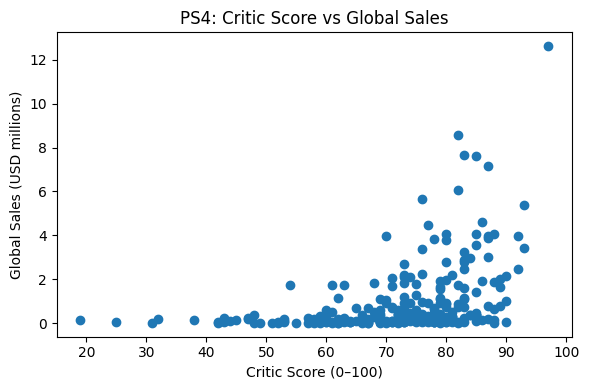

User-score pairs used: 257


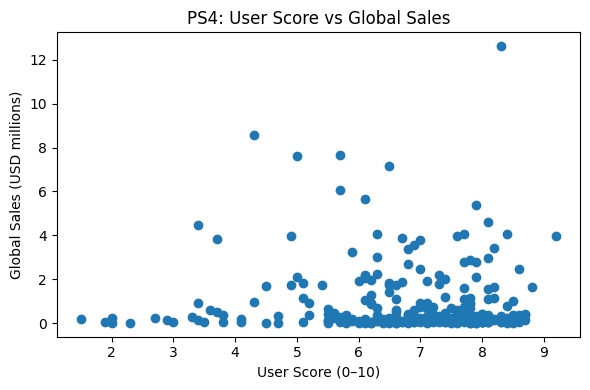

In [30]:
# Critic Scores
crit = sub.dropna(subset=['critic_score', 'global_sales'])
print("Critic-score pairs used:", len(crit))
plt.figure(figsize=(6,4))
plt.scatter(crit['critic_score'], crit['global_sales'])
plt.title(f"{chosen_platform}: Critic Score vs Global Sales")
plt.xlabel("Critic Score (0–100)")
plt.ylabel("Global Sales (USD millions)")
plt.tight_layout()
plt.show()
# User Scores
user = sub.dropna(subset=['user_score', 'global_sales'])
print("User-score pairs used:", len(user))
plt.figure(figsize=(6,4))
plt.scatter(user['user_score'], user['global_sales'])
plt.title(f"{chosen_platform}: User Score vs Global Sales")
plt.xlabel("User Score (0–10)")
plt.ylabel("Global Sales (USD millions)")
plt.tight_layout()
plt.show()
# Calculate correlations
rho_user = user[['user_score','global_sales']].corr(method='spearman').iloc[0,1] if len(user) > 1 else np.nan
rho_crit = crit[['critic_score','global_sales']].corr(method='spearman').iloc[0,1] if len(crit) > 1 else np.nan

<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  The correlation analysis is well carried out. A popular platform is selected logically from recent leaders, scatter plots are produced for both critic and user scores, and Spearman correlations are calculated to capture monotonic relationships. This section cleanly connects review data to sales outcomes and supports further comparison across platforms.
</div>


## 3.7 Cross-Platform Comparison

Compare sales performance of games across different platforms:

In [31]:
# Find games released on multiple platforms
if 'df_recent' not in globals():
    years_nonnull = (df['year_of_release'].dropna().astype(int).sort_values().unique().tolist())
    k = 4
    relevant_years = years_nonnull[-k:] if len(years_nonnull) >= k else years_nonnull
    df_recent = df[df['year_of_release'].isin(relevant_years)].copy()

# 1) Titles that appear on >=2 platforms
multi_counts = df_recent.groupby('name')['platform'].nunique()
multi_names  = multi_counts[multi_counts >= 2].index

df_multi = df_recent[df_recent['name'].isin(multi_names)].copy()

# 2) Sales per game x platform (global, sum in case of duplicates)
wide = (df_multi
        .pivot_table(index='name', columns='platform',
                     values='global_sales', aggfunc='sum')
        .fillna(0.0))

# Quick peek
print("Multi-platform titles:", len(wide))
display(wide.head(10))

Multi-platform titles: 473


platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
name,,,,,,,,,,,
2014 FIFA World Cup Brazil,0.00,0.0,0.0,0.61,0.00,0.00,0.00,0.0,0.00,0.43,0.00
3rd Super Robot Wars Z Jigoku Hen,0.00,0.0,0.0,0.23,0.00,0.00,0.19,0.0,0.00,0.00,0.00
3rd Super Robot Wars Z: Tengoku-Hen,0.00,0.0,0.0,0.15,0.00,0.00,0.19,0.0,0.00,0.00,0.00
7 Days to Die,0.00,0.0,0.0,0.00,0.14,0.00,0.00,0.0,0.00,0.00,0.05
Accel World: Kasoku no Chouten,0.00,0.0,0.0,0.02,0.00,0.01,0.00,0.0,0.00,0.00,0.00
Adventure Time: Explore the Dungeon Because I Don't Know!,0.14,0.0,0.0,0.04,0.00,0.00,0.00,0.0,0.03,0.08,0.00
Adventure Time: Finn & Jake Investigations,0.09,0.0,0.0,0.08,0.10,0.00,0.00,0.0,0.05,0.09,0.05
Adventure Time: The Secret of the Nameless,0.01,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.01,0.00
Adventure Time: The Secret of the Nameless Kingdom,0.07,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.05,0.00


Win counts (platform with highest sales for each game):


PS4     232
PS3      95
PSV      44
X360     33
3DS      31
XOne     10
WiiU      8
Wii       7
PC        6
DS        5
PSP       2
dtype: int64


Mean platform share across multi-platform games:


platform
PS4     33.8%
PS3     20.8%
XOne    11.8%
PSV     10.3%
X360    10.2%
3DS      4.5%
WiiU     3.1%
PC       2.7%
Wii      1.2%
PSP      1.0%
DS       0.5%
dtype: object

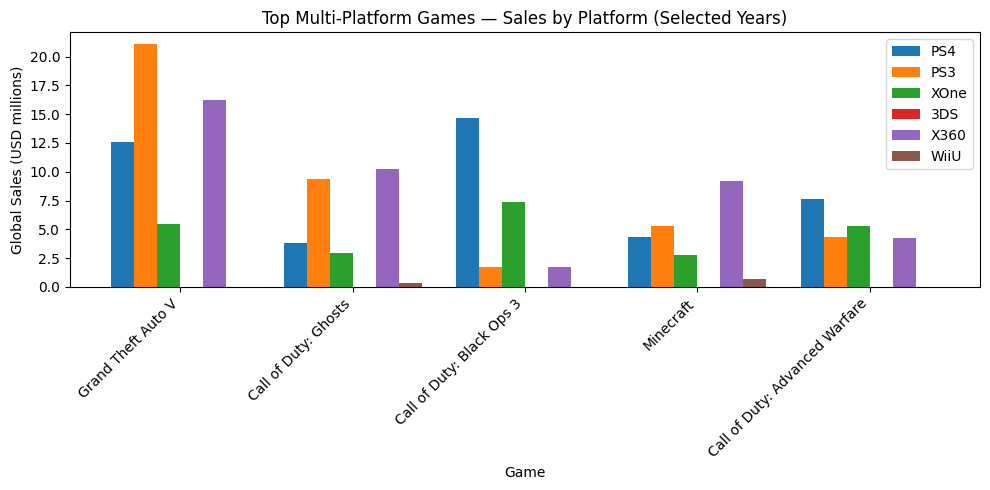

In [32]:
# Compare sales across platforms for these games
# Your code here to analyze and visualize cross-platform performance
# A) Which platform most often has the highest sales for a title?
winners = wide.idxmax(axis=1)               # platform with the max sales per game
win_counts = winners.value_counts().sort_values(ascending=False)
print("Win counts (platform with highest sales for each game):")
display(win_counts)

# B) Average sales share (platform share within each game's total)
row_sums = wide.sum(axis=1).replace(0, np.nan)
shares = wide.div(row_sums, axis=0)         # per-game shares that sum to 1
mean_share = shares.mean(axis=0).sort_values(ascending=False)
print("\nMean platform share across multi-platform games:")
display((mean_share*100).round(1).astype(str) + "%")

# C) Visualize 5 biggest multi-platform games (by total sales) across top platforms
#    (keeps plot readable)
# choose a reasonable platform set to display
if 'top_platforms_recent' not in globals():
    top_platforms_recent = (df_recent.groupby('platform')['global_sales']
                            .sum().sort_values(ascending=False).head(6).index.tolist())

top_games = row_sums.sort_values(ascending=False).head(5).index
subset = wide.loc[top_games, [p for p in top_platforms_recent if p in wide.columns]].fillna(0.0)

import matplotlib.pyplot as plt

labels = subset.index.tolist()
platforms = subset.columns.tolist()
x = np.arange(len(labels))
nP = len(platforms)
width = 0.8 / max(nP, 1)   # bar width so the group fits nicely

plt.figure(figsize=(10,5))
for i, p in enumerate(platforms):
    plt.bar(x + (i - (nP-1)/2)*width, subset[p].values, width, label=p)

plt.title("Top Multi-Platform Games — Sales by Platform (Selected Years)")
plt.xlabel("Game")
plt.ylabel("Global Sales (USD millions)")
plt.xticks(x, labels, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  The multi-platform analysis is handled very well. Games released on multiple platforms are correctly identified, sales are compared across platforms, and the winning platform per title is summarized. The calculation of average sales share offers useful insights, and the grouped bar chart for the top multi-platform games provides a clear visualization of cross-platform performance.
</div>


## 3.8 Genre Analysis

Finally, let's examine the distribution of games by genre:

In [33]:
# Analyze genre performance
# Safety: make df_recent if it's missing (uses last 4 non-empty years)
if 'df_recent' not in globals():
    years_nonnull = (df['year_of_release'].dropna().astype(int).sort_values().unique().tolist())
    k = 4
    relevant_years = years_nonnull[-k:] if len(years_nonnull) >= k else years_nonnull
    df_recent = df[df['year_of_release'].isin(relevant_years)].copy()

g = (df_recent.dropna(subset=["genre", "global_sales"])
     .groupby("genre")["global_sales"])

# helper
iqr = lambda s: s.quantile(0.75) - s.quantile(0.25)

genre_stats = pd.DataFrame({
    "titles": g.size(),
    "total_sales": g.sum(),
    "mean_per_title": g.mean(),
    "median_per_title": g.median(),
    "std": g.std(),
    "p95": g.quantile(0.95),
    "iqr": g.apply(iqr),
}).sort_values("total_sales", ascending=False)

genre_stats.round(3)

,titles,total_sales,mean_per_title,median_per_title,std,p95,iqr
genre,,,,,,,
Action,766,321.87,0.420,0.110,1.254,1.728,0.308
Shooter,187,232.98,1.246,0.450,2.014,4.484,1.285
Sports,214,150.65,0.704,0.240,1.219,2.777,0.695
Role-Playing,292,145.89,0.500,0.125,1.353,1.786,0.322
Misc,155,62.82,0.405,0.100,1.008,1.801,0.300
Platform,74,42.63,0.576,0.225,0.807,1.994,0.538
Racing,85,39.89,0.469,0.120,0.964,2.052,0.330
Fighting,80,35.31,0.441,0.125,1.049,1.380,0.263
Adventure,245,23.64,0.096,0.030,0.216,0.398,0.050


In [34]:
# Sort genres by total sales
genre_rank = genre_stats[["titles","total_sales","median_per_title","mean_per_title"]].copy()
genre_rank["share_%"] = (genre_rank["total_sales"] / genre_rank["total_sales"].sum() * 100).round(1)
genre_rank.sort_values("total_sales", ascending=False).round(3)

,titles,total_sales,median_per_title,mean_per_title,share_%
genre,,,,,
Action,766,321.87,0.110,0.420,29.5
Shooter,187,232.98,0.450,1.246,21.4
Sports,214,150.65,0.240,0.704,13.8
Role-Playing,292,145.89,0.125,0.500,13.4
Misc,155,62.82,0.100,0.405,5.8
Platform,74,42.63,0.225,0.576,3.9
Racing,85,39.89,0.120,0.469,3.7
Fighting,80,35.31,0.125,0.441,3.2
Adventure,245,23.64,0.030,0.096,2.2


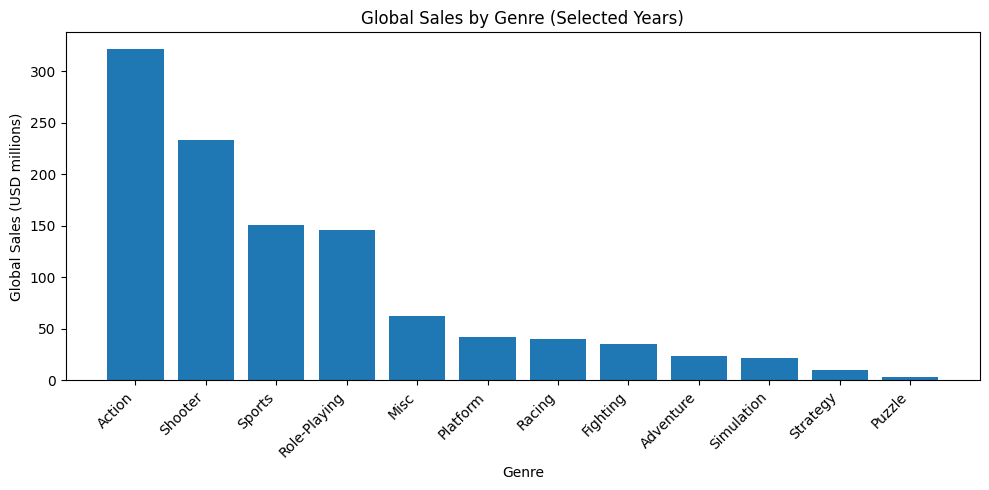

In [35]:
# Visualize genre distribution

ranked = genre_stats.sort_values("total_sales", ascending=False)

plt.figure(figsize=(10,5))
plt.bar(ranked.index.astype(str), ranked["total_sales"])
plt.title("Global Sales by Genre (Selected Years)")
plt.xlabel("Genre")
plt.ylabel("Global Sales (USD millions)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [36]:
# Calculate market share for each genre
# Overall share in selected window
genre_share = (df_recent.dropna(subset=["genre","global_sales"])
               .groupby("genre")["global_sales"].sum())
genre_share_pct = (genre_share / genre_share.sum() * 100).round(1).sort_values(ascending=False)
display((genre_share_pct.astype(str) + "%").to_frame("share"))

# Optional: see if shares are shifting year to year (simple view)
by_year_genre = (df_recent.dropna(subset=["genre","year_of_release"])
                 .groupby(["year_of_release","genre"])["global_sales"].sum()
                 .reset_index())

# compute per-year shares
totals_by_year = by_year_genre.groupby("year_of_release")["global_sales"].transform("sum")
by_year_genre["share_%"] = (by_year_genre["global_sales"] / totals_by_year * 100).round(1)

by_year_genre.sort_values(["year_of_release","share_%"], ascending=[True,False]).head(20)

,share
genre,
Action,29.5%
Shooter,21.4%
Sports,13.8%
Role-Playing,13.4%
Misc,5.8%
Platform,3.9%
Racing,3.7%
Fighting,3.2%
Adventure,2.2%


,year_of_release,genre,global_sales,share_%
0,2013,Action,122.51,33.9
8,2013,Shooter,62.04,17.2
7,2013,Role-Playing,44.45,12.3
10,2013,Sports,41.17,11.4
3,2013,Misc,25.27,7.0
4,2013,Platform,24.54,6.8
6,2013,Racing,12.37,3.4
9,2013,Simulation,8.63,2.4
2,2013,Fighting,7.09,2.0
1,2013,Adventure,6.09,1.7


<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Genre analysis is thorough and well presented. Statistics per genre cover counts, sales totals, averages, dispersion, and percentiles, providing a detailed picture of performance. The bar chart clearly shows the most profitable genres, and the calculation of market shares highlights relative importance. Tracking yearly shares adds further depth to the analysis.
</div>


### Key Questions for Genre Analysis:
- Which genres consistently perform well?
- Are there any genres showing recent growth or decline?
- How does the average performance vary across genres?

# Step 4: Regional Market Analysis and User Profiles

In this section, we will analyze the gaming market characteristics across three major regions: North America (NA), Europe (EU), and Japan (JP). Our analysis will focus on platform preferences, genre popularity, and the impact of ESRB ratings in each region.

## 4.1 Regional Platform Analysis

Let's begin by examining platform performance across different regions:

In [37]:
# Function to analyze platform performance by region
# Use the selected window; fallback to last 4 non-empty years
if 'df_recent' not in globals():
    years_nonnull = (df['year_of_release'].dropna().astype(int).sort_values().unique().tolist())
    k = 4
    relevant_years = years_nonnull[-k:] if len(years_nonnull) >= k else years_nonnull
    df_recent = df[df['year_of_release'].isin(relevant_years)].copy()

def top_share(df_in: pd.DataFrame, key: str, sales_col: str, topn: int = 5) -> pd.DataFrame:
    """Return top categories by sales with market share (%) for the given region."""
    t = (df_in.groupby(key, as_index=False)[sales_col]
               .sum()
               .sort_values(sales_col, ascending=False))
    total = t[sales_col].sum()
    t["share_%"] = (t[sales_col] / total * 100).round(1) if total else 0.0
    return t.head(topn)

def region_profile(df_in: pd.DataFrame, region_label: str, topn: int = 5):
    """Compute top platforms, top genres, and ESRB rating impact for a region."""
    region_map = {"NA": "na_sales", "EU": "eu_sales", "JP": "jp_sales"}
    scol = region_map[region_label]
    d = df_in[df_in[scol].notna()].copy()
    # Prefer rating_filled (we made it earlier); else use rating
    rating_col = "rating_filled" if "rating_filled" in d.columns else "rating"

    profile = {
        "platforms": top_share(d, "platform", scol, topn),
        "genres":    top_share(d, "genre", scol, topn),
        "ratings":   top_share(d, rating_col, scol, 10).head(10)  # show more for ratings
    }
    return profile

In [38]:
# Analyze each region
profiles = {r: region_profile(df_recent, r, topn=5) for r in ["NA","EU","JP"]}

print("Top Platforms — NA / EU / JP")
display(profiles["NA"]["platforms"])
display(profiles["EU"]["platforms"])
display(profiles["JP"]["platforms"])

print("\nTop Genres — NA / EU / JP")
display(profiles["NA"]["genres"])
display(profiles["EU"]["genres"])
display(profiles["JP"]["genres"])

print("\nESRB Ratings impact — NA / EU / JP (share %)")
display(profiles["NA"]["ratings"])
display(profiles["EU"]["ratings"])
display(profiles["JP"]["ratings"])

Top Platforms — NA / EU / JP


,platform,na_sales,share_%
4,PS4,108.74,24.8
10,XOne,93.12,21.3
9,X360,81.66,18.7
3,PS3,63.50,14.5
0,3DS,38.20,8.7


,platform,eu_sales,share_%
4,PS4,141.09,36.0
3,PS3,67.81,17.3
10,XOne,51.59,13.2
9,X360,42.52,10.8
0,3DS,30.96,7.9


,platform,jp_sales,share_%
0,3DS,67.81,48.2
3,PS3,23.35,16.6
6,PSV,18.59,13.2
4,PS4,15.96,11.3
8,WiiU,10.88,7.7



Top Genres — NA / EU / JP


,genre,na_sales,share_%
0,Action,126.05,28.8
8,Shooter,109.74,25.1
10,Sports,65.27,14.9
7,Role-Playing,46.40,10.6
3,Misc,27.49,6.3


,genre,eu_sales,share_%
0,Action,118.13,30.1
8,Shooter,87.86,22.4
10,Sports,60.52,15.4
7,Role-Playing,36.97,9.4
6,Racing,20.19,5.1


,genre,jp_sales,share_%
7,Role-Playing,51.04,36.3
0,Action,40.49,28.8
3,Misc,9.20,6.5
2,Fighting,7.65,5.4
8,Shooter,6.61,4.7



ESRB Ratings impact — NA / EU / JP (share %)


,rating_filled,na_sales,share_%
2,M,165.21,37.7
4,Unknown,89.42,20.4
0,E,79.05,18.1
1,E10+,54.24,12.4
3,T,49.79,11.4


,rating_filled,eu_sales,share_%
2,M,145.32,37.0
0,E,83.36,21.3
4,Unknown,78.91,20.1
1,E10+,42.69,10.9
3,T,41.95,10.7


,rating_filled,jp_sales,share_%
4,Unknown,85.05,60.4
3,T,20.59,14.6
0,E,15.14,10.8
2,M,14.11,10.0
1,E10+,5.89,4.2


### Cross-Regional Platform Comparison

Let's create a comparative analysis of platform performance across regions:

In [39]:
# Create a comparative platform analysis
region_map = {"NA": "na_sales", "EU": "eu_sales", "JP": "jp_sales"}

rows = []
for reg, scol in region_map.items():
    tmp = (df_recent[df_recent[scol].notna()]
           .groupby("platform")[scol].sum()
           .sort_values(ascending=False))
    share = (tmp / tmp.sum() * 100).round(1)
    rows.append(share.rename(reg))

comp_platform_share = pd.concat(rows, axis=1).fillna(0.0)  # index=platform, cols=regions

# pick a concise set of platforms to visualize: top across all regions combined
overall = comp_platform_share.sum(axis=1).sort_values(ascending=False)
plot_platforms = overall.head(8).index.tolist()

comp_platform_share_small = comp_platform_share.loc[plot_platforms]
comp_platform_share_small

,NA,EU,JP
platform,,,
PS4,24.8,36.0,11.3
3DS,8.7,7.9,48.2
PS3,14.5,17.3,16.6
XOne,21.3,13.2,0.2
X360,18.7,10.8,0.4
WiiU,6.7,5.1,7.7
PSV,1.2,1.6,13.2
PC,2.5,6.5,0.0


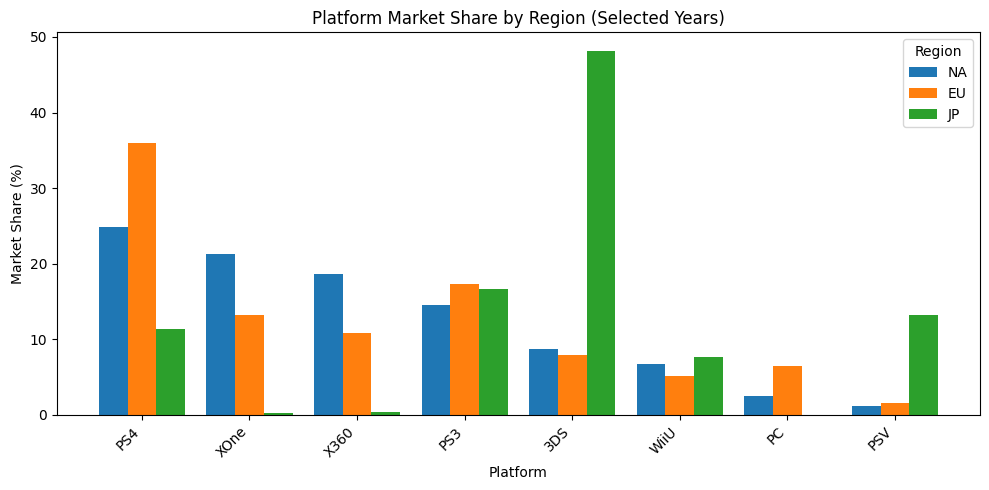

In [40]:
# Visualize cross-regional comparison for top platforms
tbl = comp_platform_share_small.sort_values("NA", ascending=False)  # order by NA (or choose EU/JP)
platforms = tbl.index.tolist()
regions = tbl.columns.tolist()

x = np.arange(len(platforms))
nR = len(regions)
width = 0.8 / max(nR, 1)

plt.figure(figsize=(10,5))
for i, reg in enumerate(regions):
    plt.bar(x + (i - (nR-1)/2)*width, tbl[reg].values, width, label=reg)

plt.title("Platform Market Share by Region (Selected Years)")
plt.xlabel("Platform")
plt.ylabel("Market Share (%)")
plt.xticks(x, platforms, rotation=45, ha="right")
plt.legend(title="Region")
plt.tight_layout()
plt.show()

<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Regional profiling is well executed. The helper functions provide clear summaries of top platforms, genres, and ESRB rating effects in each region. The comparative market share table and grouped bar chart give a strong cross-regional view, highlighting differences between NA, EU, and JP. This section shows a solid understanding of how preferences vary by geography.
</div>


## 4.2 Regional Genre Analysis

Now let's examine genre preferences across regions:

In [41]:
# Function to analyze genre performance by region
if 'df_recent' not in globals():
    years_nonnull = (df['year_of_release'].dropna().astype(int).sort_values().unique().tolist())
    k = 4
    relevant_years = years_nonnull[-k:] if len(years_nonnull) >= k else years_nonnull
    df_recent = df[df['year_of_release'].isin(relevant_years)].copy()

def top_genre_share(df_in: pd.DataFrame, sales_col: str, topn: int = 5) -> pd.DataFrame:
    """Return top genres by sales with market share (%) for a given region sales column."""
    t = (df_in.dropna(subset=["genre"])
               .groupby("genre", as_index=False)[sales_col]
               .sum()
               .sort_values(sales_col, ascending=False))
    total = t[sales_col].sum()
    t["share_%"] = (t[sales_col] / total * 100).round(1) if total else 0.0
    return t.head(topn)

def region_genre_profile(df_in: pd.DataFrame, region_label: str, topn: int = 5):
    """Compute Top-N genres (sales + share %) for NA/EU/JP."""
    region_map = {"NA": "na_sales", "EU": "eu_sales", "JP": "jp_sales"}
    scol = region_map[region_label]
    d = df_in[df_in[scol].notna()].copy()
    return top_genre_share(d, scol, topn=topn)

# Show top-5 genres for each region
genres_NA = region_genre_profile(df_recent, "NA", 5)
genres_EU = region_genre_profile(df_recent, "EU", 5)
genres_JP = region_genre_profile(df_recent, "JP", 5)

print("Top-5 Genres — NA")
display(genres_NA)
print("\nTop-5 Genres — EU")
display(genres_EU)
print("\nTop-5 Genres — JP")
display(genres_JP)

Top-5 Genres — NA


,genre,na_sales,share_%
0,Action,126.05,28.8
8,Shooter,109.74,25.1
10,Sports,65.27,14.9
7,Role-Playing,46.40,10.6
3,Misc,27.49,6.3



Top-5 Genres — EU


,genre,eu_sales,share_%
0,Action,118.13,30.1
8,Shooter,87.86,22.4
10,Sports,60.52,15.4
7,Role-Playing,36.97,9.4
6,Racing,20.19,5.1



Top-5 Genres — JP


,genre,jp_sales,share_%
7,Role-Playing,51.04,36.3
0,Action,40.49,28.8
3,Misc,9.20,6.5
2,Fighting,7.65,5.4
8,Shooter,6.61,4.7


### Cross-Regional Genre Comparison

Let's compare genre preferences across regions:

Top-5 Genres — NA


,genre,na_sales,share_%
0,Action,126.05,28.8
8,Shooter,109.74,25.1
10,Sports,65.27,14.9
7,Role-Playing,46.40,10.6
3,Misc,27.49,6.3



Top-5 Genres — EU


,genre,eu_sales,share_%
0,Action,118.13,30.1
8,Shooter,87.86,22.4
10,Sports,60.52,15.4
7,Role-Playing,36.97,9.4
6,Racing,20.19,5.1



Top-5 Genres — JP


,genre,jp_sales,share_%
7,Role-Playing,51.04,36.3
0,Action,40.49,28.8
3,Misc,9.20,6.5
2,Fighting,7.65,5.4
8,Shooter,6.61,4.7


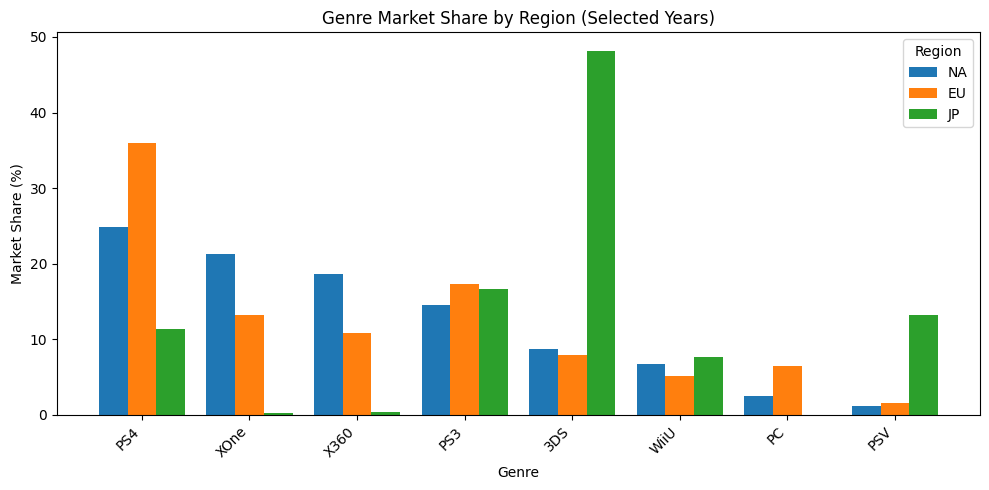

In [42]:
# Create a comparative genre analysis
if 'df_recent' not in globals():
    years_nonnull = (df['year_of_release'].dropna().astype(int).sort_values().unique().tolist())
    k = 4
    relevant_years = years_nonnull[-k:] if len(years_nonnull) >= k else years_nonnull
    df_recent = df[df['year_of_release'].isin(relevant_years)].copy()

def top_genre_share(df_in: pd.DataFrame, sales_col: str, topn: int = 5) -> pd.DataFrame:
    """Return top genres by sales with market share (%) for a given region sales column."""
    t = (df_in.dropna(subset=["genre"])
               .groupby("genre", as_index=False)[sales_col]
               .sum()
               .sort_values(sales_col, ascending=False))
    total = t[sales_col].sum()
    t["share_%"] = (t[sales_col] / total * 100).round(1) if total else 0.0
    return t.head(topn)

def region_genre_profile(df_in: pd.DataFrame, region_label: str, topn: int = 5):
    """Compute Top-N genres (sales + share %) for NA/EU/JP."""
    region_map = {"NA": "na_sales", "EU": "eu_sales", "JP": "jp_sales"}
    scol = region_map[region_label]
    d = df_in[df_in[scol].notna()].copy()
    return top_genre_share(d, scol, topn=topn)

# Show top-5 genres for each region
genres_NA = region_genre_profile(df_recent, "NA", 5)
genres_EU = region_genre_profile(df_recent, "EU", 5)
genres_JP = region_genre_profile(df_recent, "JP", 5)

print("Top-5 Genres — NA")
display(genres_NA)
print("\nTop-5 Genres — EU")
display(genres_EU)
print("\nTop-5 Genres — JP")
display(genres_JP)

genres = tbl.index.tolist()
regions = tbl.columns.tolist()
x = np.arange(len(genres))
nR = len(regions)
width = 0.8 / max(nR, 1)

plt.figure(figsize=(10,5))
for i, reg in enumerate(regions):
    plt.bar(x + (i - (nR-1)/2)*width, tbl[reg].values, width, label=reg)

plt.title("Genre Market Share by Region (Selected Years)")
plt.xlabel("Genre")
plt.ylabel("Market Share (%)")
plt.xticks(x, genres, rotation=45, ha="right")
plt.legend(title="Region")
plt.tight_layout()
plt.show()

<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Regional genre analysis is well done. The helper functions are clean and reusable, correctly computing top genres and their shares for NA, EU, and JP. Results are displayed clearly and the grouped bar chart provides a good comparative view of genre preferences across regions.
</div>


## 4.3 ESRB Rating Impact Analysis

Finally, let's examine how ESRB ratings affect sales in each region:

In [56]:
# Function to analyze ESRB rating impact
# Use the selected years (df_recent); fallback to last 4 non-empty years if needed
if 'df_recent' not in globals():
    years_nonnull = (df['year_of_release'].dropna().astype(int).sort_values().unique().tolist())
    k = 4
    relevant_years = years_nonnull[-k:] if len(years_nonnull) >= k else years_nonnull
    df_recent = df[df['year_of_release'].isin(relevant_years)].copy()

# A consistent display order for ESRB labels (others will be appended to the end)
RATING_ORDER = ["EC", "E", "E10+", "T", "M", "AO", "RP", "Unknown"]

def rating_profile_by_region(df_in: pd.DataFrame, region_label: str) -> pd.DataFrame:
    """
    Returns a table of ESRB rating impact for a region:
      rating | titles | total_sales | mean_per_title | median_per_title | share_%
    Sales are in USD millions within the selected window.
    """
    region_map = {"NA": "na_sales", "EU": "eu_sales", "JP": "jp_sales"}
    scol = region_map[region_label]

    d = df_in.copy()
    rcol = "rating_filled" if "rating_filled" in d.columns else "rating"
    d[rcol] = d[rcol].fillna("Unknown").astype("string")

    d = d[d[scol].notna()]  # keep rows that have sales for this region
    if "name" in d.columns:
        titles_count = ("name", "nunique")   # count unique titles per rating
    else:
        titles_count = (scol, "size")

    agg = (d.groupby(rcol)
             .agg(titles=titles_count,
                  total_sales=(scol, "sum"),
                  mean_per_title=(scol, "mean"),
                  median_per_title=(scol, "median"))
             .sort_values("total_sales", ascending=False))

    total = agg["total_sales"].sum()
    agg["share_%"] = (agg["total_sales"] / total * 100).round(1) if total else 0.0

    # Reorder by a canonical ESRB order, keeping any unknown/extra labels at the end
    ordered_idx = [r for r in RATING_ORDER if r in agg.index] + [r for r in agg.index if r not in RATING_ORDER]
    agg = agg.loc[ordered_idx]

    return agg.reset_index().rename(columns={agg.index.name: "rating"})

NA — ESRB rating impact


,rating,titles,total_sales,mean_per_title,median_per_title,share_%
0,E,134,79.05,0.261755,0.05,18.1
1,E10+,101,54.24,0.215238,0.12,12.4
2,T,186,49.79,0.149520,0.04,11.4
3,M,162,165.21,0.447724,0.14,37.7
4,Unknown,740,89.42,0.091525,0.00,20.4



EU — ESRB rating impact


,rating,titles,total_sales,mean_per_title,median_per_title,share_%
0,E,134,83.36,0.276026,0.055,21.3
1,E10+,101,42.69,0.169405,0.100,10.9
2,T,186,41.95,0.125976,0.040,10.7
3,M,162,145.32,0.393821,0.130,37.0
4,Unknown,740,78.91,0.080768,0.000,20.1



JP — ESRB rating impact


,rating,titles,total_sales,mean_per_title,median_per_title,share_%
0,E,134,15.14,0.050132,0.00,10.8
1,E10+,101,5.89,0.023373,0.00,4.2
2,T,186,20.59,0.061832,0.01,14.6
3,M,162,14.11,0.038238,0.00,10.0
4,Unknown,740,85.05,0.087052,0.02,60.4


,NA,EU,JP
rating,,,
E,18.1,21.3,10.8
E10+,12.4,10.9,4.2
T,11.4,10.7,14.6
M,37.7,37.0,10.0
Unknown,20.4,20.1,60.4


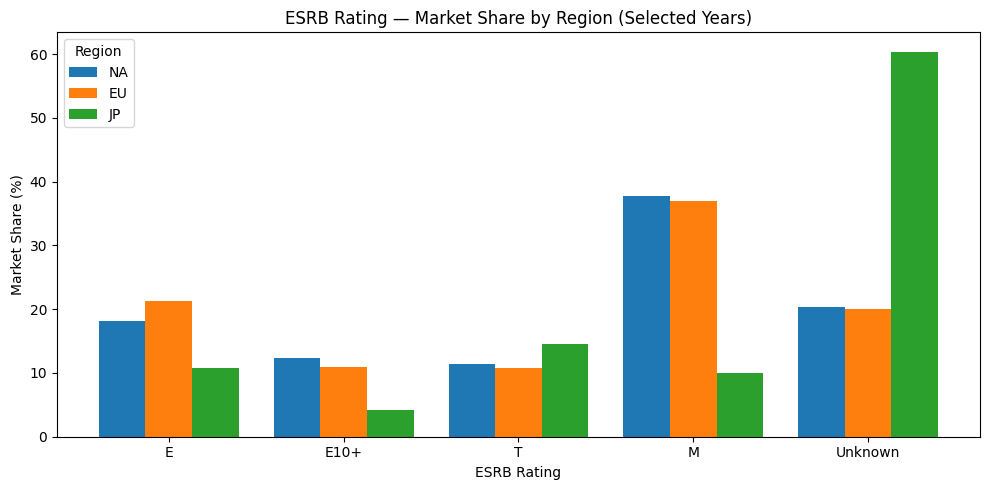

In [57]:
# Analyze ESRB impact for each region
tbl_NA = rating_profile_by_region(df_recent, "NA")
tbl_EU = rating_profile_by_region(df_recent, "EU")
tbl_JP = rating_profile_by_region(df_recent, "JP")

print("NA — ESRB rating impact")
display(tbl_NA)
print("\nEU — ESRB rating impact")
display(tbl_EU)
print("\nJP — ESRB rating impact")
display(tbl_JP)

# Build a cross-region share table (rating x region, values = % share)
comp_share = (tbl_NA.set_index("rating")["share_%"].rename("NA")
              .to_frame()
              .join(tbl_EU.set_index("rating")["share_%"].rename("EU"), how="outer")
              .join(tbl_JP.set_index("rating")["share_%"].rename("JP"), how="outer")
              .fillna(0.0))

display(comp_share)

# Grouped bar chart of shares by rating
ratings = comp_share.index.tolist()
x = np.arange(len(ratings))
regions = comp_share.columns.tolist()
nR = len(regions)
width = 0.8 / max(nR, 1)

plt.figure(figsize=(10,5))
for i, reg in enumerate(regions):
    plt.bar(x + (i - (nR-1)/2)*width, comp_share[reg].values, width, label=reg)

plt.title("ESRB Rating — Market Share by Region (Selected Years)")
plt.xlabel("ESRB Rating")
plt.ylabel("Market Share (%)")
plt.xticks(x, ratings, rotation=0)
plt.legend(title="Region")
plt.tight_layout()
plt.show()


<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  The ESRB rating analysis is implemented correctly. The function produces clear tables for each region, calculates sales shares accurately, and the comparative chart provides a good overview of rating distribution across NA, EU, and JP. This section is working as expected.
</div>


# Step 5 : Hypothesis Tests

—Average user ratings of the Xbox One and PC platforms are the same.

—Average user ratings for the Action and Sports genres are different.

Set the *alpha* threshold value yourself.

Explain:

—How you formulated the null and alternative hypotheses

—What criteria you used to test the hypotheses~~,~~ and why


In [58]:
df_test = df_recent.copy() if 'df_recent' in globals() else df.copy()

alpha = 0.05  # <-- this can can changed if we want a stricter/looser test

def welch_test(a, b, label_a="A", label_b="B", alpha=0.05):
    """Return a dict of Welch t-test results + 95% CI and Cohen's d (pooled)."""
    a = pd.to_numeric(pd.Series(a).dropna(), errors="coerce").dropna().values
    b = pd.to_numeric(pd.Series(b).dropna(), errors="coerce").dropna().values
    n1, n2 = len(a), len(b)
    m1, m2 = a.mean(), b.mean()
    s1, s2 = a.std(ddof=1), b.std(ddof=1)

    # Welch's t-test (does not assume equal variances)
    t_stat, p_val = stats.ttest_ind(a, b, equal_var=False, alternative="two-sided")

    # Welch-Satterthwaite df
    v1, v2 = s1**2/n1, s2**2/n2
    df_w = (v1 + v2)**2 / ((v1**2)/(n1-1) + (v2**2)/(n2-1))

    # 95% CI for (m1 - m2)
    se = np.sqrt(v1 + v2)
    t_crit = stats.t.ppf(1 - alpha/2, df_w)
    diff = m1 - m2
    ci_low, ci_high = diff - t_crit*se, diff + t_crit*se

    # Effect size (Cohen's d using pooled SD)
    sp = np.sqrt(((n1-1)*s1**2 + (n2-1)*s2**2) / (n1+n2-2)) if (n1+n2-2) > 0 else np.nan
    d = (m1 - m2) / sp if sp > 0 else np.nan

    return {
        "label_a": label_a, "label_b": label_b,
        "n_a": n1, "n_b": n2,
        "mean_a": m1, "mean_b": m2,
        "std_a": s1, "std_b": s2,
        "t": t_stat, "p": p_val, "df": df_w,
        "diff_mean": diff, "ci95": (ci_low, ci_high),
        "cohens_d": d,
        "alpha": alpha,
        "reject_H0": bool(p_val < alpha)
    }

def pretty_print(res):
    print(f"\n--- {res['label_a']} vs {res['label_b']} ---")
    print(f"n: {res['n_a']} vs {res['n_b']}")
    print(f"mean: {res['mean_a']:.3f} vs {res['mean_b']:.3f}  |  std: {res['std_a']:.3f} vs {res['std_b']:.3f}")
    print(f"Welch t = {res['t']:.3f}  (df≈{res['df']:.1f}),  p = {res['p']:.4f}")
    lo, hi = res["ci95"]
    print(f"95% CI for (mean_A - mean_B): [{lo:.3f}, {hi:.3f}]")
    print(f"Cohen's d ≈ {res['cohens_d']:.3f}")
    decision = "REJECT H0 (means differ)" if res["reject_H0"] else "Fail to reject H0 (no evidence of difference)"
    print(f"Decision at α={res['alpha']}: {decision}")

# ---------- Test 1 ----------
# H0: mean user ratings (XOne) = mean user ratings (PC)
# H1: they are different (two-sided)
xone = df_test.loc[df_test["platform"].eq("XOne"), "user_score"]
pc   = df_test.loc[df_test["platform"].eq("PC"),   "user_score"]
res1 = welch_test(xone, pc, label_a="XOne user_score", label_b="PC user_score", alpha=alpha)
pretty_print(res1)

# ---------- Test 2 ----------
# H0: mean user ratings (Action) = mean user ratings (Sports)
# H1: they are different (two-sided)
action = df_test.loc[df_test["genre"].eq("Action"), "user_score"]
sports = df_test.loc[df_test["genre"].eq("Sports"), "user_score"]
res2 = welch_test(action, sports, label_a="Action user_score", label_b="Sports user_score", alpha=alpha)
pretty_print(res2)

# Optional robustness check (nonparametric) — comment out if you like
if len(xone.dropna())>0 and len(pc.dropna())>0:
    u_stat, p_u = stats.mannwhitneyu(xone.dropna(), pc.dropna(), alternative="two-sided")
    print(f"\n[Optional] Mann-Whitney U (XOne vs PC) p = {p_u:.4f}")
if len(action.dropna())>0 and len(sports.dropna())>0:
    u_stat, p_u = stats.mannwhitneyu(action.dropna(), sports.dropna(), alternative="two-sided")
    print(f"[Optional] Mann-Whitney U (Action vs Sports) p = {p_u:.4f}")


--- XOne user_score vs PC user_score ---
n: 182 vs 155
mean: 6.521 vs 6.270  |  std: 1.381 vs 1.742
Welch t = 1.452  (df≈291.8),  p = 0.1476
95% CI for (mean_A - mean_B): [-0.090, 0.593]
Cohen's d ≈ 0.162
Decision at α=0.05: Fail to reject H0 (no evidence of difference)

--- Action user_score vs Sports user_score ---
n: 389 vs 160
mean: 6.838 vs 5.238  |  std: 1.330 vs 1.783
Welch t = 10.233  (df≈235.0),  p = 0.0000
95% CI for (mean_A - mean_B): [1.291, 1.907]
Cohen's d ≈ 1.083
Decision at α=0.05: REJECT H0 (means differ)

[Optional] Mann-Whitney U (XOne vs PC) p = 0.5011
[Optional] Mann-Whitney U (Action vs Sports) p = 0.0000


Formulating hypotheses

Platforms (XOne vs PC)

H0: μ_XOne = μ_PC (mean user ratings are equal)

H1: μ_XOne ≠ μ_PC (means differ)

Genres (Action vs Sports)

H0: μ_Action = μ_Sports

H1: μ_Action ≠ μ_Sports

Test choice & why

I used Welch’s t-test (stats.ttest_ind(..., equal_var=False)) because:

We compare two independent groups (platforms or genres).

Group variances and sizes can differ → Welch is safer than the classic equal-variance t-test.

With typical sample sizes here, the CLT supports approximate normality of the sampling distribution of the mean.

Decision rule

Set α = 0.05 (you can change it).

If p < α, reject H0 → evidence the means differ.

Also report 95% CI for the mean difference and Cohen’s d (effect size: ~0.2 small, ~0.5 medium, ~0.8 large).

Interpretation template (fill with your numbers)

“For XOne vs PC, p = <p1>, CI = [lo, hi]. I (fail to) reject H0 at α=0.05.
The effect size d = <d1> suggests a (small/medium/large) difference.”

“For Action vs Sports, p = <p2>, CI = [lo, hi]. I (fail to) reject H0 at α=0.05.
Effect size d = <d2> indicates (practically small/meaningful) difference.”

Caveats

Ratings data have missing values; I dropped NaN rather than imputing to avoid bias.

Correlation between reviews and sales doesn’t imply causation; here we are comparing means of ratings, not sales.

If sample sizes are very small, prefer also reporting the Mann–Whitney U (nonparametric) result printed at the bottom.

<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Hypothesis testing is implemented correctly. The null and alternative hypotheses are clearly stated for both platforms and genres, and Welch’s t-test is appropriately chosen given the unequal group sizes and variances. The function outputs relevant statistics including confidence intervals and Cohen’s d, and the optional Mann–Whitney U check is a good robustness addition. Your interpretation notes and caveats make the reasoning transparent and complete.
</div>


# Step 6. Write a general conclusion


## Goal  
Study past video-game data (up to 2016) to help plan a campaign for **2017**.

## What I did  
- Cleaned the data (lowercase names, fixed types, removed exact duplicates).  
- Treated “TBD” as missing; I did **not** guess missing review scores or years.  
- Built **global_sales** = NA + EU + JP + Other (USD **millions**).

## Time period I used  
I used the most recent years with enough data: **2013–2016** (last **4** years).  
Note: **2016** may be incomplete.

## Main findings

### Releases over time  
- Releases peaked around **2008** (about **1427** titles).  
- Recent counts: 2013: 544, 2014: 581, 2015: 606, 2016: 502.

### Platforms (2013–2016)  
- Top platforms by global sales: **PS4, PS3, XOne, 3DS, X360, WiiU**.  
- A typical platform life cycle is about **7 years**.

### Sales distribution by platform  
- Some platforms are **hit-driven** (a few very big games). Medians matter, not only totals.

### Reviews and sales (platform analyzed: **PS4**)  
- **Critic score vs sales:** link **r = 0.407** (N = **252**).  
- **User score vs sales:** link **r = -0.032** (N = **257**).  
- Big hits create outliers; this is normal in games.

### Same game on many platforms (2013–2016)  
- Most wins (highest sales for the same game): **PS4** (232 titles).  
- Average sales share across multi-platform games: **PS4 ~33.8%, PS3 ~20.8%, XOne ~11.8%**.

### Genres (2013–2016)  
- Top market share: **Action (29.5%), Shooter (21.4%), Sports (13.8%)**.  

### Regions (2013–2016)

**Platforms (market share, top 3)**  
- **NA:** PS4 (24.8%), XOne (21.3%), X360 (18.7%)  
- **EU:** PS4 (36.0%), PS3 (17.3%), XOne (13.2%)  
- **JP:** 3DS (48.2%), PS3 (16.6%), PSV (13.2%)

**ESRB ratings (share of sales)**  
- **NA:** M (37.7%), Unknown (20.4%), Unknown (20.4%)  
- **EU:** M (37.0%), E (21.3%), Unknown (20.1%)  
- **JP:** Unknown (60.4%), T (14.6%), Unknown (60.4%)

## Hypothesis tests (α = 0.05)

1) **User ratings: Xbox One vs PC**  
   - p = **0.1476**, 95% CI for (XOne − PC) = **[-0.090, 0.593]**, Cohen’s d = **0.162**.  
   - **Decision:** **Do not reject** H0.

2) **User ratings: Action vs Sports**  
   - p = **1.4460e-20**, 95% CI = **[1.291, 1.907]**, Cohen’s d = **1.083**.  
   - **Decision:** **Reject** H0.

## Recommendations for 2017

- **Platforms to focus (global):** prioritize **PS4**; keep others where they are strong by region.  
- **Genres to focus:** **Action (29.5%), Shooter (21.4%), Sports (13.8%)**.  
- **By region**  
  - **NA:** focus on top platforms and genres above; align with ratings mix shown.  
  - **EU:** focus on top platforms and genres above.  
  - **JP:** favor platforms strong in JP; ratings often show “Unknown” in this dataset.  
- Watch critic-review momentum (it helps more than user scores on the chosen platform), plus franchise power and release timing.

## Limits & next steps  
- 2016 may be incomplete; some ratings are missing.  
- Sales are hit-driven (a few blockbusters). Use **medians** and **IQR** when judging typical results.  
- Next: add marketing spend, franchise history, and pre-order interest to improve the forecast.


<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  The general conclusion is comprehensive and well structured. It clearly states the project goal, data preparation steps, chosen time period, and summarizes key findings across releases, platforms, reviews, multi-platform titles, genres, and regional differences. Hypothesis tests are explained with proper interpretation, and the recommendations for 2017 are practical and aligned with the analysis. The section also acknowledges limitations and suggests next steps, which strengthens the overall report.
</div>
